In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Saurabh\\Downloads\\mall - mall.csv")

In [3]:
df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
df = df.drop(columns = ['CustomerID' , 'Genre'])

In [5]:
x = df.iloc[: , [0,1]].values

In [6]:
from sklearn.cluster import KMeans

In [7]:
import matplotlib.pyplot as plt

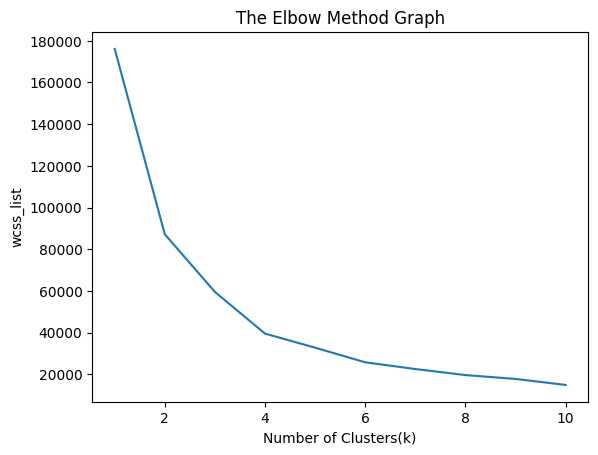

In [8]:
a = []

for i in range(1,11):
    b = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11) , a)

plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

# From the above plot, we can see the elbow point is at 4. So the number of clusters here will be 4.

In [11]:
b = KMeans(n_clusters=4, init='k-means++', random_state = 42)
y_predict = b.fit_predict(x)

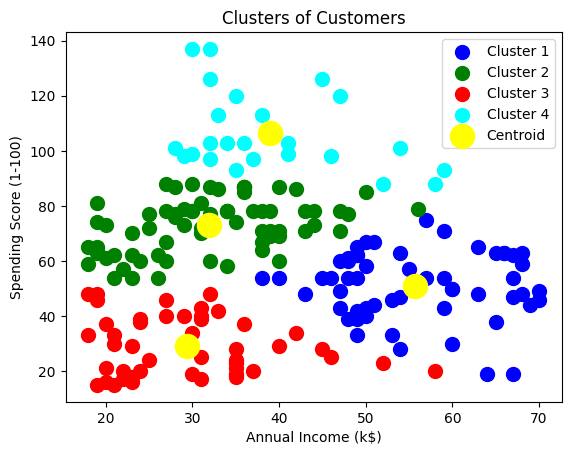

In [12]:
# Visualising the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') # for
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') # for
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') # for
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') # for

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow',
           label = 'Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()